# **Univariate Linear Regression on the California Housing Prices Dataset**

[Vist Github Page](https://github.com/imdarshik/CSCN8010-labs/tree/main/week3)

![California Housing Image](images/housing.webp)

The goal of this report is to train and evaluate univariate linear regression models on a dataset related to houses in California, based on the 1990 census data. Specifically, we aim to predict the median house value using three independent variables: median income, population, and the number of households.

### **Getting the data**

The dataset used in this analysis is sourced from the second chapter of Aurélien Géron's book 'Hands-On Machine Learning with Scikit-Learn and TensorFlow.' The data pertains to California districts and includes information such as longitude, latitude, housing median age, total rooms, total bedrooms, population, households, median income, median house value, and ocean proximity.

[*Link to California Housing Prices Dataset*](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [2]:
# Import the pandas library
import pandas as pd

# Load data to dataframe
df = pd.read_csv("data/archive/housing.csv")

In [3]:
# Display few samples
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Data shape
print(df.shape)

(20640, 10)


In [5]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### **Exploratory Data Analysis (EDA)**

In [7]:
# Explore statistics for the following variables:
# Independent variables: median income, population & number of housholds
# Dependent variable: median house value
df[["median_income", "population", "households", "median_house_value"]].describe()

,median_income,population,households,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,1425.476744,499.539680,206855.816909
std,1.899822,1132.462122,382.329753,115395.615874
min,0.499900,3.000000,1.000000,14999.000000
25%,2.563400,787.000000,280.000000,119600.000000
50%,3.534800,1166.000000,409.000000,179700.000000
75%,4.743250,1725.000000,605.000000,264725.000000
max,15.000100,35682.000000,6082.000000,500001.000000


* **Median Income**: The median income in the dataset ranges from 5,000 USD to 150,000 USD with a mean of 38,700 USD and a standard deviation of 19,000 USD. This variable represents the median income of households in a given California district, serving as a key independent variable for predicting median house values.

* **Population**: The population variable exhibits a wide range, spanning from 3 to 35,682, with a mean of 1425.48 and a standard deviation of 1132.46. It denotes the count of individuals residing in households within a specific California district, providing insights into the demographic aspect of the dataset.

* **Number of Households**: Ranging from 1 to 6082, with a mean of 499.54 and a standard deviation of 382.33, the number of households variable indicates the total count of households in a California district. It serves as another independent variable in the linear regression models, influencing the prediction of median house values.

* **Median House Value**: The median house value, the dependent variable of interest, ranges from 14,999 USD to 500,001 USD. With a mean of 206,855.82 USD and a standard deviation of 115,395.62 USD, this variable represents the central measure of housing prices in a California district based on the 1990 census data. The prediction of this variable will be the focus of the univariate linear regression analysis with respect to median income, population, and number of households.

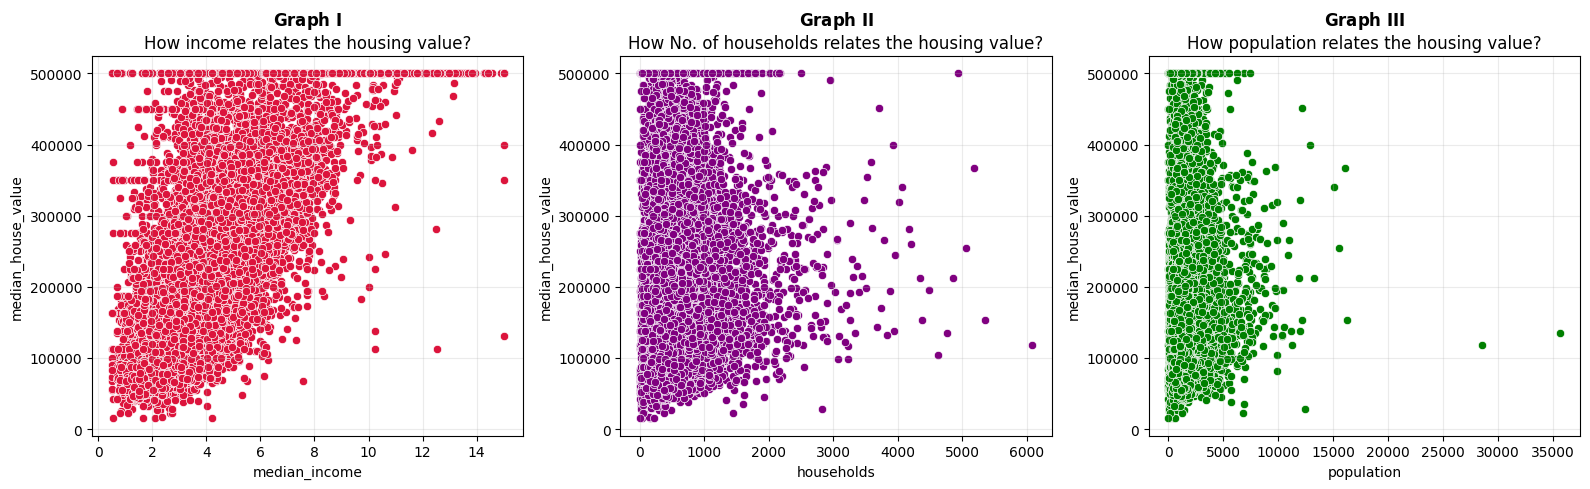

In [44]:
# Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))

# Median income VS Median house value
plt.subplot(1,3,1)
sns.scatterplot(df, x="median_income", y="median_house_value", color="crimson")
plt.title("$\\bf{Graph}$ $\\bf{I}$\nHow income relates the housing value?")
plt.grid(alpha=0.25)

# Number of households VS Median house value
plt.subplot(1,3,2)
sns.scatterplot(df, x="households", y="median_house_value", color="purple")
plt.title("$\\bf{Graph}$ $\\bf{II}$\nHow No. of households relates the housing value?")
plt.grid(alpha=0.25)

# Population VS Median house value
plt.subplot(1,3,3)
sns.scatterplot(df, x="population", y="median_house_value", color="green")
plt.title("$\\bf{Graph}$ $\\bf{III}$\nHow population relates the housing value?")
plt.grid(alpha=0.25)

plt.tight_layout()
plt.show()

* In **Graph I**, which is a scatter plot depicting the relationship between median income and housing value, the data points are dispersed in a manner suggesting a linear trend. However, there is some uncertainty observed at the upper end of the graph, where a distinct pattern emerges. Specifically, for nearly every x value representing median income, there is a corresponding y value of 500,000 USD. This observation raises the possibility that the data might be capped at 500,000 USD, indicating that values for houses exceeding this threshold are constrained or limited in the dataset

* In **Graph II**, the scatter plot illustrates the relationship between the number of households and housing value. Below 1000 households, the graph displays dense clusters of points across all price ranges up to 500,000 USD. However, as the number of households or housing blocks surpasses 1000, the density decreases progressively, and there is no specific pattern or trend observed in the pricing of houses.

* Likewise, in **Graph III**, which depicts the relationship between the number of individuals or population and housing value, the majority of observations are densely concentrated below 1000. This suggests that only a few housing blocks accommodate more than 1000 people, possibly indicating the presence of hostels, large apartments, dormitories, and similar structures. There are a few houses or blocks with a population exceeding 15,000 individuals, indicating a potential outlier in the dataset

### **Modeling: Linear Regression**

In [35]:
# Import necessary libraries for modeling
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Variable to store regression results
model_results = {
    "fit": [],
    "intercept" : [],
    "slope" : [],
    "mae" : [],
    "mse" : []
}

#### Median House Value VS. Median Income

In [36]:
# Model1
model1 = LinearRegression()
model1.fit(X=df[["median_income","housing_median_age"]], y=df[["median_house_value"]])

# Model 1 Evaluate
mae = mean_absolute_error(df['median_house_value'], model1.predict(X=df[["median_income", "housing_median_age"]]))
mse = mean_squared_error(df['median_house_value'], model1.predict(X=df[["median_income", "housing_median_age"]]))

# Display results
print(f"Intercept: {model1.intercept_[0]}")
print(f"Slope: {model1.coef_[0]}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

# Store results for summarizing
model_results["fit"].append("Median Income vs. Median House Value vs. Housing Median Age")
model_results["intercept"].append(model1.intercept_[0])
model_results["slope"].append(model1.coef_[0])
model_results["mae"].append(mae)
model_results["mse"].append(mse)

Intercept: -10189.03275908262
Slope: [43169.1907545   1744.13444566]
MAE: 60355.85615789204
MSE: 6536319572.710422


In [21]:
import plotly.express as px
import plotly.graph_objects as go

In [37]:
fig = px.scatter_3d(
    x=df["median_income"],
    y=df["housing_median_age"],
    z=df["median_house_value"],
    labels={'x': 'Median income 1', 'y': 'median age', 'z': 'Median housing value'},
    size_max=1,
    opacity=0.2
)


# Create a surface plot
surface = go.Surface(x=df["median_income"], y=df["housing_median_age"], z=model1.predict(X=df[["median_income", "housing_median_age"]]), colorscale='Reds', opacity=0.7, showscale=False)

fig.add_trace(surface)

fig.show()

#### Median House Value VS. Households

In [66]:
# Model2
model2 = LinearRegression()
model2.fit(X=df[["households"]], y=df[["median_house_value"]])

# Model 2 Evaluate
mae = mean_absolute_error(df['median_house_value'], model2.predict(X=df[["households"]]))
mse = mean_squared_error(df['median_house_value'], model2.predict(X=df[["households"]]))

# Display results
print(f"Intercept: {model2.intercept_[0]}")
print(f"Slope: {model2.coef_[0][0]}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

# Store results for summarizing
model_results["fit"].append("Households vs. Median House Value")
model_results["intercept"].append(model2.intercept_[0])
model_results["slope"].append(model2.coef_[0][0])
model_results["mae"].append(mae)
model_results["mse"].append(mse)

Intercept: 196928.57716233088
Slope: 19.872775155643875
MAE: 90802.74324318448
MSE: 13257776904.728533


#### Median House Value VS. Population

In [67]:
# Model3
model3 = LinearRegression()
model3.fit(X=df[["population"]], y=df[["median_house_value"]])

# Model 3 Evaluate
mae = mean_absolute_error(df['median_house_value'], model3.predict(X=df[["population"]]))
mse = mean_squared_error(df['median_house_value'], model3.predict(X=df[["population"]]))

# Display results
print(f"Intercept: {model3.intercept_[0]}")
print(f"Slope: {model3.coef_[0][0]}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

# Store results for summarizing
model_results["fit"].append("Population vs. Median House Value")
model_results["intercept"].append(model3.intercept_[0])
model_results["slope"].append(model3.coef_[0][0])
model_results["mae"].append(mae)
model_results["mse"].append(mse)

Intercept: 210436.26207627333
Slope: -2.511752774615085
MAE: 91153.82009473183
MSE: 13307412412.389355


### **Results Summary**

In [86]:
# Make data frame of the results dictionary
results = pd.DataFrame(model_results)
results

,fit,intercept,slope,mae,mse
0,Median Income vs. Median House Value,45085.576703,41793.849202,62625.933791,7.011312e+09
1,Households vs. Median House Value,196928.577162,19.872775,90802.743243,1.325778e+10
2,Population vs. Median House Value,210436.262076,-2.511753,91153.820095,1.330741e+10


### **Regression Lines**

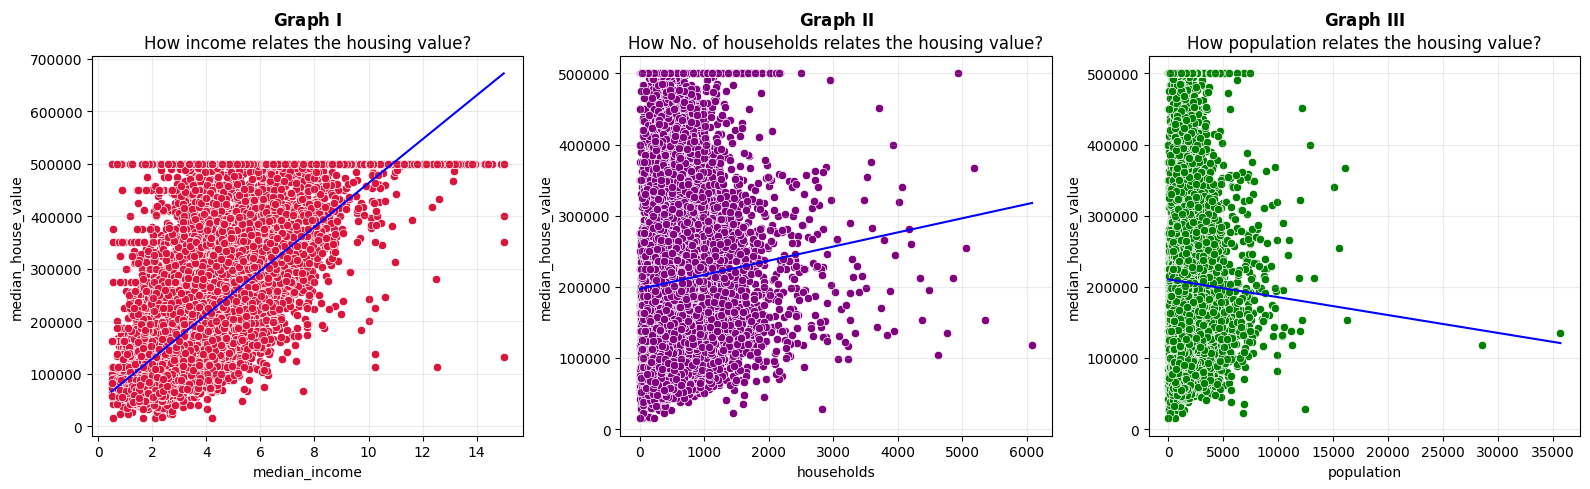

In [102]:
# Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))

# Median income VS Median house value
plt.subplot(1,3,1)
sns.scatterplot(df, x="median_income", y="median_house_value", color="crimson")
sns.lineplot(x=df["median_income"], y=model1.predict(X=df[["median_income"]]).reshape(-1), color="blue")
plt.title("$\\bf{Graph}$ $\\bf{IV}$\nHow income relates the housing value?")
plt.grid(alpha=0.25)

# Number of households VS Median house value
plt.subplot(1,3,2)
sns.scatterplot(df, x="households", y="median_house_value", color="purple")
sns.lineplot(x=df["households"], y=model2.predict(X=df[["households"]]).reshape(-1), color="blue")
plt.title("$\\bf{Graph}$ $\\bf{V}$\nHow No. of households relates the housing value?")
plt.grid(alpha=0.25)

# Population VS Median house value
plt.subplot(1,3,3)
sns.scatterplot(df, x="population", y="median_house_value", color="green")
sns.lineplot(x=df["population"], y=model3.predict(X=df[["population"]]).reshape(-1), color="blue")
plt.title("$\\bf{Graph}$ $\\bf{VI}$\nHow population relates the housing value?")
plt.grid(alpha=0.25)

plt.tight_layout()
plt.show()

### **Conclusion**

* **Median Income vs. Median House Value**:

    The fit for median income against median house value is quite good. The intercept at 45,085.58 USD is like a starting point (not very meaningful in this case), and the slope of 41,793.85 USD means that, on average, for each extra 10,000 USD in median income, the house value tends to go up by about 41,793.85 USD. The errors (MAE and MSE) are relatively low, indicating a decent fit.

* **Households vs. Median House Value**:

    The model comparing households to median house value has higher errors, suggesting a bit more variability. The intercept at 196,928.58 USD doesn't have a practical meaning. The positive slope of 19.87 means that, on average, each extra household is associated with an increase in median house value by about 19.87 USD. The errors (MAE and MSE) are higher compared to the median income fit, indicating a less precise fit.

* **Population vs. Median House Value**:

    The fit for population against median house value is okay, with errors similar to the households fit. The intercept at 210,436.26 USD doesn't have a clear real-world meaning. The negative slope of -2.51 means that, on average, for each extra person in the population, the median house value tends to decrease by about 2.51 USD. The errors (MAE and MSE) are comparable to the households fit, indicating a moderate fit.

In [6]:
# !jupyter nbconvert --to html Practical_lab3.ipynb